>1. This is an example code to generate classification data of two classes
>2. Based on the code above, generate data

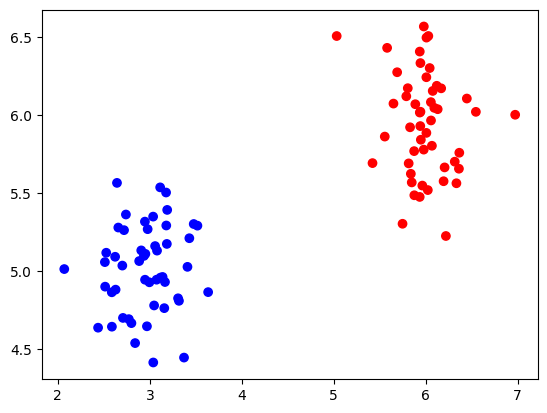

In [230]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

N1 = 50#100 or 50
N2 = 50
K=2
sigma = 0.1

mean = (6,6)
cov = [[sigma, 0], [0,sigma]]
X1 = np.random.multivariate_normal(mean, cov, N1)
c1= ['red'] * len(X1)
mean = (3,5)
cov = [[sigma,0], [0, sigma]]
X2 = np.random.multivariate_normal(mean, cov, N2)
c2= ['blue'] * len(X2)

# outlier:
mean = (8,6)
cov = [[sigma,0],[0, sigma]]
X3 = np.random.multivariate_normal(mean, cov, int(np.floor(N2)))
c3= ['blue' ] * len(X3)

#x2 = np.concatenate((X2,X3)) # open for nl=100 and close for nl=50
#c2 = np.concatenate((c2,c3)) # open for nl=100 and close for nl=50

X = np.concatenate((X1,X2))
color = np.concatenate((c1,c2))

T=[]
for n in range(0,len(X)):
    if(n<len(X1)):
        T.append(0)
    if(n>=len(X1) and n<len(X1)+len(X2)):
        T.append(1)

plt.scatter(X[:, 0], X[:, 1], marker = 'o',c=color)
plt.show( )

>3. Implement the MAP for classification, so that using the above data as training, we can generate a classifier in the basis function space (a space with higher dimensionality). Show the first and second bases

In [231]:
def Guassian_basis_m(xn, M, m, X):
    mu = np.linspace(np.min(X), np.max(X), M)
    sigma = 2
    item = - ((xn[0] - mu[m]) ** 2 + (xn[1] - mu[m]) ** 2 ) / (2 * (sigma ** 2))
    basis_function = np.exp(item)
    return basis_function

def sigmoid(w, ff):      
    ff_w = ff.dot(w)
    return 1/(1 + np.exp(-ff_w))

def MAP_classification(X, T, M, alpha):
    N = len(X)
    t = np.array(T).reshape((-1,1))
    identity_M = np.identity(M)
    SS_inverse = (1/alpha) * identity_M
    ff = np.zeros([N, M])

    for n in range(N):
        for m in range(M):
            ff[n][m] = Guassian_basis_m(X[n], M, m, X)

    # newton's method:
    w = np.zeros([M, 1])
    while 1:
        sigmoid_result = sigmoid(w, ff)
        identity_N = np.identity(N)
        R = np.zeros([N,N])

        for i in range(N):
            R[i] = (sigmoid_result[i] * (1 - sigmoid_result[i]))*identity_N[i]

        E_1 = np.dot(SS_inverse,w)
        E_2 = np.dot(ff.T, sigmoid_result-t)
        E = E_1 + E_2
        H_inverse = linalg.inv(SS_inverse + np.dot(ff.T.dot(R),ff))
        w_new = w - np.dot(H_inverse, E)
        
        if linalg.norm(w_new - w) < 1e-6:
            w = w_new
            return w, H_inverse,ff
        else:
            w = w_new

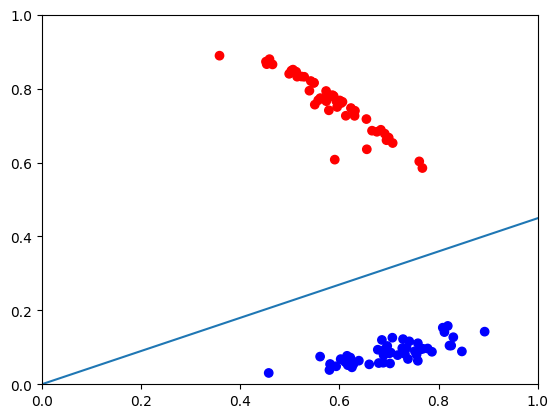

In [232]:
w, H_inverse, ff = MAP_classification(X,T,M = 3,alpha = 10)
x_plot = np.linspace(0,1,50)
plt.scatter(ff[:,1],ff[:,2],color = color)
plt.plot(x_plot , -w[1]/w[2]*x_plot)
plt.axis([0,1,0,1])
plt.show()

>4. In the testing stage, use any other locations in the original space (in the original space with low dimensionality, in the range of 0 to 10) as the test data, and plot the predicted labels (whose
values between 0 to 1) in colors

In [233]:
def Probability(w, H_inverse, M, x_input, X):
    ff_n = np.zeros([M,1])
    
    for m in range(M):
        ff_n[m][0] = Guassian_basis_m(x_input, M, m, X)
    
    a_MAP = np.dot(w.T,ff_n)
    sigma = np.dot(np.dot(ff_n.T, H_inverse) , ff_n)
    a = a_MAP / np.sqrt( 1 + (np.pi * sigma)/8  )
    return 1/ (1+ np.exp(-a))

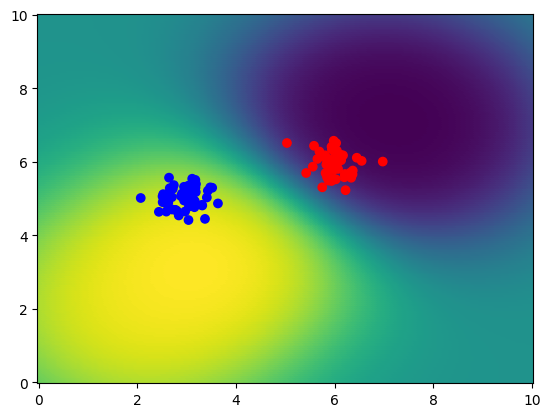

In [234]:
mseh_number = 200
ix = np.linspace(0,10,mseh_number)
iy = np.linspace(0,10,mseh_number)
ic = np.zeros([mseh_number,mseh_number])
mseh_x, mseh_y=np.meshgrid(ix,iy)

x_item = np.zeros([1,2])
w,H_inverse,ff = MAP_classification(X,T,3,2)

# fulfill color
for i in range(mseh_number):
    for j in range(mseh_number):
        x_item[0][0] = ix[i]
        x_item[0][1] = iy[j]
        Probability_x = Probability(w, H_inverse, 3, x_item[0],X)
        ic[i][j] = Probability_x
        
plt.pcolormesh(mseh_x, mseh_y,ic,edgecolors='face')  
plt.scatter(X[:,0], X[:,1], marker = 'o', c = color)   
plt.show()